<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/MICE_imputation_rf_lr_ada_xgb_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/My Drive/'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv(path + 'Copy of train.psv', sep='|')

In [5]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,99.0,100.0,NaN,NaN,71.0,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,2,0
1,97.5,100.0,NaN,NaN,NaN,NaN,15.0,NaN,-16.0,16.0,NaN,7.19,25.0,NaN,72.5,13.5,58.0,8.1,112.5,1.7,NaN,73.0,8.6,1.75,3.2,4.4,3.65,NaN,26.9,8.35,74.4,15.65,104.0,93.0,69.66,0,1.0,0.0,-0.02,3,0
2,96.0,100.0,NaN,NaN,70.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,4,0
3,100.0,99.0,NaN,NaN,75.0,NaN,14.0,NaN,-15.0,11.0,NaN,7.24,24.0,96.0,NaN,12.0,NaN,7.7,113.0,1.6,NaN,85.0,8.9,1.60,2.9,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,5,0
4,102.0,100.0,36.0,NaN,74.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,6,0


In [6]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [7]:
cols = ['HR', 'O2Sat','Temp', 'SBP', 'MAP', 'DBP', 'Resp','Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']

In [8]:
data = data[cols]

In [9]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,99.0,100.0,NaN,NaN,71.0,NaN,13.5,69.66,0,1.0,0.0,2,0
1,97.5,100.0,NaN,NaN,NaN,NaN,15.0,69.66,0,1.0,0.0,3,0
2,96.0,100.0,NaN,NaN,70.0,NaN,13.0,69.66,0,1.0,0.0,4,0
3,100.0,99.0,NaN,NaN,75.0,NaN,14.0,69.66,0,1.0,0.0,5,0
4,102.0,100.0,36.0,NaN,74.0,NaN,17.0,69.66,0,1.0,0.0,6,0


In [10]:
missing_count = data.isnull().sum().sort_values(ascending = True)

In [11]:
missing_count

Age                 0
Gender              0
ICULOS              0
SepsisLabel         0
HR             107735
MAP            137670
O2Sat          149329
Resp           157166
SBP            173917
DBP            434103
Unit1          495981
Unit2          495981
Temp           772577
dtype: int64

In [12]:
missing_percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [13]:
missing_percent

Temp           66.190514
Unit2          42.493159
Unit1          42.493159
DBP            37.191763
SBP            14.900334
Resp           13.465193
O2Sat          12.793758
MAP            11.794874
HR              9.230193
SepsisLabel     0.000000
ICULOS          0.000000
Gender          0.000000
Age             0.000000
dtype: float64

In [14]:
missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['missing_count', 'missing_percent'])

In [15]:
missing_data

,missing_count,missing_percent
Age,0,0.000000
Gender,0,0.000000
ICULOS,0,0.000000
SepsisLabel,0,0.000000
HR,107735,9.230193
MAP,137670,11.794874
O2Sat,149329,12.793758
Resp,157166,13.465193
SBP,173917,14.900334
DBP,434103,37.191763


In [16]:
categorical = data.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [17]:
cat_var = list(categorical[categorical].index)
cont_var = list(categorical[~categorical].index)
cont_var.pop(-1)

'SepsisLabel'

In [18]:
data = data.sample(n=100000, random_state=None)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from fancyimpute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,0.353234,0.974359,0.646302,0.273408,0.151079,0.069597,0.287879,0.860581,1.0,1.0,0.0,0.053731,0.0
1,0.288557,0.935897,0.671383,0.352060,0.219424,0.168498,0.242424,0.777209,1.0,0.0,1.0,0.023881,0.0
2,0.338308,0.961538,NaN,0.217228,0.212230,0.194139,0.212121,0.519419,1.0,NaN,NaN,0.032836,0.0
3,0.238806,0.910256,0.709325,0.352060,0.233813,0.142857,0.469697,0.639535,1.0,0.0,1.0,0.080597,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.427907,0.0,1.0,0.0,0.000000,0.0


In [24]:
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
data_imputed = mice_imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = data_imputed.drop('SepsisLabel', axis=1)
y = data_imputed['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     19590
         1.0       0.94      0.04      0.07       410

    accuracy                           0.98     20000
   macro avg       0.96      0.52      0.53     20000
weighted avg       0.98      0.98      0.97     20000



In [29]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, preds)
print(cf_matrix)

[[19589     1]
 [  394    16]]


In [30]:
rf_probs = model.predict_proba(X_test)

In [31]:
rf_probs = rf_probs[:, 1]

In [32]:
from sklearn.metrics import roc_auc_score

# calculate scores
rf_auc = roc_auc_score(y_test, rf_probs)


print('Random Forest: ROC AUC= {} %'.format(round(rf_auc, 3)*100))

Random Forest: ROC AUC= 84.89999999999999 %


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state= 0 )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote.shape, y_smote.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((156852, 12), (156852,))

In [35]:
X_smote_test, y_smote_test = smote.fit_resample(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
model_smote = RandomForestClassifier()
model_smote.fit(X_smote, y_smote)
preds_smote = model_smote.predict(X_smote_test)

In [37]:
print(classification_report(y_smote_test, preds_smote))

              precision    recall  f1-score   support

         0.0       0.68      0.99      0.80     19590
         1.0       0.98      0.53      0.68     19590

    accuracy                           0.76     39180
   macro avg       0.83      0.76      0.74     39180
weighted avg       0.83      0.76      0.74     39180



In [38]:
cf_matrix_smote = confusion_matrix(y_smote_test, preds_smote)
print(cf_matrix_smote)

[[19376   214]
 [ 9290 10300]]


In [39]:
rf_probs_smote = model.predict_proba(X_smote_test)

In [40]:
rf_probs_smote = rf_probs_smote[:, 1]

In [41]:
from sklearn.metrics import roc_auc_score

# calculate scores
rf_smote_auc = roc_auc_score(y_smote_test, rf_probs_smote)


print('Random Forest_smote: ROC AUC= {} %'.format(round(rf_smote_auc, 3)*100))

Random Forest_smote: ROC AUC= 81.8 %


In [42]:
from sklearn.metrics import roc_curve

In [43]:
rf_fpr, rf_tpr, rf_thres = roc_curve(y_smote_test, rf_probs_smote)

In [44]:
data_imputed.to_csv(path+'data_imputed.csv')

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [46]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_smote, y_smote)

5

In [47]:
parameters = {'solver':('newton-cg', 'liblinear'), 'C':[0.001]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
log_reg = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)

log_reg.fit(X_smote, y_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001], 'solver': ('newton-cg', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
yt_pred_log_reg = log_reg.predict(X_smote_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_smote_test, yt_pred_log_reg ))

ac= accuracy_score(y_smote_test, yt_pred_log_reg)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65     19590
         1.0       0.65      0.60      0.62     19590

    accuracy                           0.64     39180
   macro avg       0.64      0.64      0.64     39180
weighted avg       0.64      0.64      0.64     39180

test_accuracy = 63.68300153139357 % 


In [49]:
cf_matrix = confusion_matrix(y_smote_test, yt_pred_log_reg)
print(cf_matrix)

[[13241  6349]
 [ 7880 11710]]


In [50]:
logreg_probs = log_reg.predict_proba(X_smote_test)

In [51]:
logreg_probs = logreg_probs[:, 1]

In [52]:
logreg_auc = roc_auc_score(y_smote_test, logreg_probs)

In [53]:
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))

Logistic: ROC AUC= 70.5 %


In [54]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_smote_test, logreg_probs)

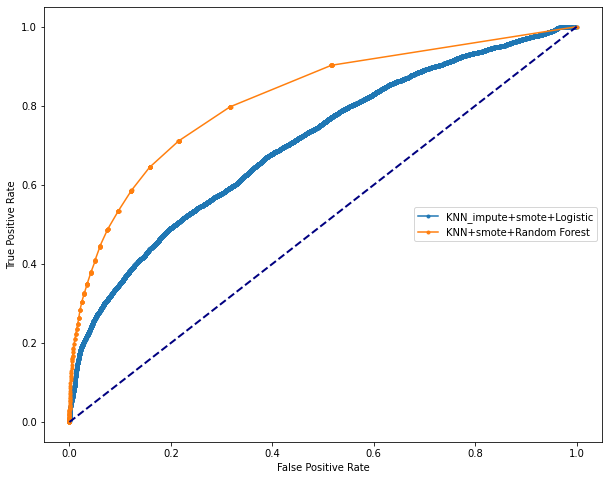

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='KNN_impute+smote+Logistic')
ax.plot(rf_fpr, rf_tpr, marker='.', label='KNN+smote+Random Forest')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

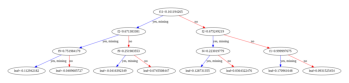

<Figure size 3600x3960 with 0 Axes>

In [56]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_smote, y_smote)

plot_tree(model)
plt.figure(figsize = (50,55))
plt.show()

In [57]:
y_pred_xgb= model.predict(X_smote_test)

from sklearn.metrics import classification_report
print(classification_report(y_smote_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     19590
         1.0       0.93      0.90      0.91     19590

    accuracy                           0.91     39180
   macro avg       0.91      0.91      0.91     39180
weighted avg       0.91      0.91      0.91     39180



In [58]:
cf_matrix = confusion_matrix(y_smote_test, y_pred_xgb)
print(cf_matrix)

[[18235  1355]
 [ 2018 17572]]


In [59]:
model_probs = model.predict_proba(X_smote_test)
model_probs = model_probs[:, 1]
model_auc = roc_auc_score(y_smote_test, model_probs)

print('XGBoost - ROC AUC= {} %'.format(round(model_auc, 3)*100))

XGBoost - ROC AUC= 97.2 %


In [60]:
model_fpr, model_tpr, model_thres = roc_curve(y_smote_test, model_probs)

In [61]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_smote, y_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [62]:
y_pred_clf= clf.predict(X_smote_test)

from sklearn.metrics import classification_report
print(classification_report(y_smote_test, y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     19590
         1.0       0.87      0.83      0.85     19590

    accuracy                           0.85     39180
   macro avg       0.85      0.85      0.85     39180
weighted avg       0.85      0.85      0.85     39180



In [63]:
cf_matrix = confusion_matrix(y_smote_test, y_pred_clf)
print(cf_matrix)

[[17212  2378]
 [ 3341 16249]]


In [64]:
clf_probs = clf.predict_proba(X_smote_test)
clf_probs = clf_probs[:, 1]
clf_auc = roc_auc_score(y_smote_test, clf_probs)

print('ADABOOST - ROC AUC= {} %'.format(round(clf_auc, 3)*100))

ADABOOST - ROC AUC= 92.10000000000001 %


In [65]:
clf_fpr, clf_tpr, clf_thres = roc_curve(y_smote_test, clf_probs)

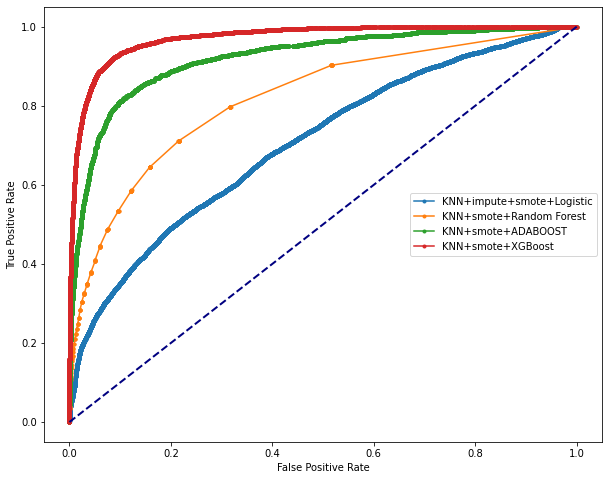

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='KNN+impute+smote+Logistic')
ax.plot(rf_fpr, rf_tpr, marker='.', label='KNN+smote+Random Forest')
ax.plot(clf_fpr, clf_tpr, marker='.', label='KNN+smote+ADABOOST')
ax.plot(model_fpr, model_tpr, marker = '.', label='KNN+smote+XGBoost')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [67]:
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('RF - ROC AUC= {} %'.format(round(rf_auc, 3)*100))
print('ADABOOST - ROC AUC= {} %'.format(round(clf_auc, 3)*100))
print('XGBoost - ROC AUC= {} %'.format(round(model_auc, 3)*100))

Logistic: ROC AUC= 70.5 %
RF - ROC AUC= 84.89999999999999 %
ADABOOST - ROC AUC= 92.10000000000001 %
XGBoost - ROC AUC= 97.2 %
